## Historical Stock volatiliy

* Download Google stock price data from the Web
* Calculate the rolling standard deviation of the log returns (volatility)
* Plot the stock price data and the results

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
%matplotlib inline

In [2]:
goog = web.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2014')

In [4]:
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406
2014-04-09,559.62,565.37,552.95,564.14,3324742
2014-04-10,565.00,565.00,539.90,540.95,4027743
2014-04-11,532.55,540.00,526.53,530.60,3916171
2014-04-14,538.25,544.10,529.56,532.52,2568020


In [7]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))

In [8]:
goog.tail()

,Open,High,Low,Close,Volume,Log_Ret
Date,,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406,0.030651
2014-04-09,559.62,565.37,552.95,564.14,3324742,0.016515
2014-04-10,565.00,565.00,539.90,540.95,4027743,-0.041976
2014-04-11,532.55,540.00,526.53,530.60,3916171,-0.019318
2014-04-14,538.25,544.10,529.56,532.52,2568020,0.003612


In [9]:
%matplotlib inline

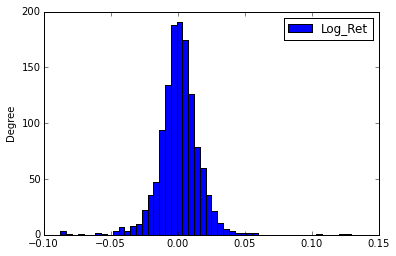

In [20]:
goog[['Log_Ret']].plot(kind='hist', bins=50)

In [27]:
goog['Ret'] = (goog['Close'] / goog['Close'].shift(1)) - 1

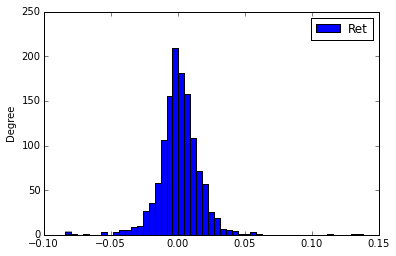

In [28]:
goog[['Ret']].plot(kind='hist', bins=50)

In [29]:
goog.tail()

,Open,High,Low,Close,Volume,Log_Ret,Ret
Date,,,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406,0.030651,0.031125
2014-04-09,559.62,565.37,552.95,564.14,3324742,0.016515,0.016652
2014-04-10,565.00,565.00,539.90,540.95,4027743,-0.041976,-0.041107
2014-04-11,532.55,540.00,526.53,530.60,3916171,-0.019318,-0.019133
2014-04-14,538.25,544.10,529.56,532.52,2568020,0.003612,0.003619


In [30]:
np.mean(goog['Log_Ret'])

0.0009423990764561333

In [31]:
np.mean(goog['Ret'])

0.0010685524214626612

In [32]:
goog['Vola'] = pd.rolling_std(goog['Ret'], window=252) * np.sqrt(252)